In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
import pandas as pd

In [2]:
X = pd.read_csv('data/chipotle_stores.csv')
X

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416


In [3]:
X = X[['latitude','longitude']]

In [4]:
 X

,latitude,longitude
0,32.606813,-85.487328
1,33.509721,-86.802756
2,33.595581,-86.647437
3,33.422582,-86.698279
4,34.154134,-86.841220
...,...,...
2624,42.565892,-87.921048
2625,43.067723,-88.048222
2626,46.904247,-96.796618
2627,46.855337,-96.861416


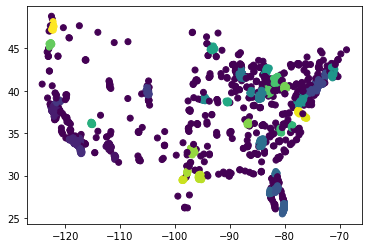

In [5]:
db = DBSCAN(eps=0.3, min_samples=10)
y_db = db.fit_predict(X)
labels = db.labels_

plt.scatter(X['longitude'], X['latitude'], c=y_db)
plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 15
Silhouette Coefficient: -0.004


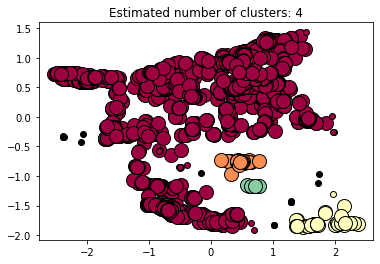

In [6]:
# #############################################################################
# Generate sample data
X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1],xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [7]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 4
Estimated number of noise points: 15
Silhouette Coefficient: -0.004


In [8]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
xrange = range
clusters = [X[labels == i] for i in xrange(n_clusters_)]

In [9]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X,y_db)
agg_dist = clf.centroids_
print(agg_dist)

[[ 0.0500131   0.023484  ]
 [-0.84882358 -1.17670836]
 [-1.11121098 -1.11320331]
 [ 0.02743432 -1.7869864 ]
 [-0.7473117  -1.54322143]
 [-0.97098711 -1.48747144]
 [ 0.23242676 -1.74255599]
 [ 0.47094224 -0.75310796]
 [ 0.64466604  1.10118359]
 [ 0.87314135  1.19138835]
 [-1.8961779   0.66752578]
 [-2.39499734  0.73993643]
 [-2.00815093  0.59871218]
 [-1.52725454  0.65708911]
 [-0.76397307  0.49441904]
 [ 0.9216601   0.27828514]
 [ 0.38045022  0.48749922]
 [ 0.49682531  0.38252508]
 [ 0.31193669 -0.12832629]
 [ 0.31092251  0.93214701]
 [ 1.00215221  1.28276747]
 [ 1.04535734  0.5572893 ]
 [ 1.56918715 -0.04637307]
 [ 0.24200292  0.12401374]
 [-0.2931073  -1.3679707 ]
 [-0.35122994  0.8273326 ]
 [-0.48203122  0.70413626]
 [ 0.79666122  0.65640614]
 [ 0.52355256  0.57400446]
 [ 1.67931767 -1.82234657]
 [ 0.61810083  0.75466309]
 [-0.29563261  0.34484585]
 [-0.97357931 -0.26849816]
 [-1.5081278  -0.31726462]
 [-1.62066842 -0.17903566]
 [-1.68167513 -0.36333273]
 [-0.13331862  0.97924546]
 

In [10]:
 X

array([[-1.03390345,  0.42248947],
       [-0.84374483,  0.34312955],
       [-0.82566215,  0.35249995],
       ...,
       [ 1.97723251, -0.25980161],
       [ 1.96693174, -0.26371084],
       [ 0.76760659, -0.74299057]])

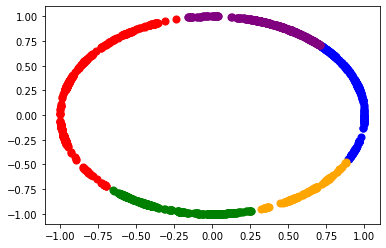

In [11]:
from sklearn.cluster import AgglomerativeClustering

X = pd.read_csv('data/chipotle_stores.csv')
X = X[['latitude','longitude']]
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X = normalize(X_scaled) 
  
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model = model.fit(X)
labels = model.labels_


plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')

plt.show()